# Section 1.2 — Data in practice

This notebook contains all the code from [Section 1.2 Data in practice](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch01_DATA.pdf#page=34) of the **No Bullshit Guide to Statistics**.

In [1]:
2 + 3

5

#### Notebook setup

In [2]:
# TODO: only keep this cell in figures notebook
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plot_helpers import savefigure

In [3]:
# TODO: only keep this cell in figures notebook
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
# RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]
# red = sns.color_palette("tab10")[3]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/data/practice"

<Figure size 640x480 with 0 Axes>

## Getting started with JupyterLab

### Download and install JupyterLab Desktop
Follow instructions in the [Python tutorial](./python_tutorial.ipynb) to install JupyterLab Desktop on your computer.

### Download the `noBSstats` notebooks and datasets

TODO: include image from attachments

### Datasets for the book

In [4]:
os.listdir("../datasets")

['.DS_Store',
 'formats',
 'minimal.csv',
 'eprices.csv',
 'players_full.csv',
 'doctors.csv',
 'kombucha.csv',
 'kombuchapop.csv',
 'visitors.csv',
 'README.md',
 'players.csv',
 'index.md',
 'exercises',
 'epriceswide.csv',
 'cut_material',
 '.ipynb_checkpoints',
 'apples.csv',
 'raw',
 'students.csv']

### Interactive notebooks for each section

In [5]:
sorted(os.listdir("../notebooks"))

['.DS_Store',
 '.ipynb_checkpoints',
 '10_DATA.md',
 '11_intro_to_data.ipynb',
 '12_data_in_practice.ipynb',
 '13_descriptive_statistics.ipynb',
 '20_PROB.md',
 '21_discrete_random_vars.ipynb',
 '22_multiple_random_vars.ipynb',
 '23_inventory_discrete_dists.ipynb',
 '24_calculus_prerequisites.ipynb',
 '25_continuous_random_vars.ipynb',
 '26_inventory_continuous_dists.ipynb',
 '27_random_var_generation.ipynb',
 '28_random_samples.ipynb',
 '30_STATS.md',
 '31_estimators.ipynb',
 '32_confidence_intervals.ipynb',
 '33_intro_to_NHST.ipynb',
 '34_analytical_approx.ipynb',
 '35_two_sample_tests.ipynb',
 '36_design.ipynb',
 '37_inventory_stats_tests.ipynb',
 '40_LINEAR_MODELS.md',
 '41_introduction_to_LMs.ipynb',
 '50_BAYESIAN_STATS.md',
 '99_mean_estimation_details.ipynb',
 '99_proportions_estimators.ipynb',
 'OLD34_analytical_approximation.ipynb',
 'README.md',
 '__pycache__',
 'attachments',
 'cut_material.ipynb',
 'drafts',
 'explorations',
 'figures',
 'htmlout',
 'index.md',
 'one_sample

### Exercises notebooks

In [6]:
sorted(os.listdir("../exercises"))

['.ipynb_checkpoints',
 '__pycache__',
 'datasets',
 'exercises_12_practical_data.ipynb',
 'exercises_13_descr_stats.ipynb',
 'exercises_21_discrete_RVs.ipynb',
 'exercises_31_estimtors.ipynb',
 'exercises_32_confidence_intervals.ipynb',
 'exercises_33_intro_to_NHST.ipynb',
 'exercises_35_two_sample_tests.ipynb',
 'figures',
 'plot_helpers.py',
 'problems_1_data.ipynb',
 'solutions',
 'stats_helpers.py']

## Data management with Pandas

The first step is to import the Pandas library.
We'll follow the standard convention of importing the `pandas` module under the alias `pd`.

In [7]:
import pandas as pd

### Data frames

#### Players dataset

In [8]:
%pycat ../datasets/players.csv

username,country,age,ezlvl,time,points,finished
mary,us,38,0,124.94,418,0
jane,ca,21,0,331.64,1149,1
emil,fr,52,1,324.61,1321,1
ivan,ca,50,1,39.51,226,0
hasan,tr,26,1,253.19,815,0
jordan,us,45,0,28.49,206,0
sanjay,ca,27,1,350.0,1401,1
lena,uk,23,0,408.76,1745,1
shuo,cn,24,1,194.77,1043,0
r0byn,us,59,0,255.55,1102,0
anna,pl,18,0,303.66,1209,1
joro,bg,22,1,381.97,1491,1


We can create a the data frame object `players`
by loading the players dataset located at `../datasets/players.csv`
by calling the function `pd.read_csv`.

In [9]:
players = pd.read_csv("../datasets/players.csv")
players

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
5,jordan,us,45,0,28.49,206,0
6,sanjay,ca,27,1,350.00,1401,1
7,lena,uk,23,0,408.76,1745,1
8,shuo,cn,24,1,194.77,1043,0
9,r0byn,us,59,0,255.55,1102,0


### Data frame properties

What type of object is `players` ?

In [10]:
type(players)

pandas.core.frame.DataFrame

The `players` data frame object has a bunch of useful properties (attributes)
and functions (methods) "attached" to it,
which we can access using the dot syntax.

#### The shape of the `players` data frame

In [11]:
players.shape

(12, 7)

#### The rows index

In [12]:
len(players.index)

12

In [13]:
players.index

RangeIndex(start=0, stop=12, step=1)

In [14]:
list(players.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

#### The columns index

In [15]:
len(players.columns)

7

In [16]:
players.columns

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

In [17]:
list(players.columns)

['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished']

#### Exploring data frame objects

In [18]:
players.head(3)
# players.tail(3)
# players.sample(3)

,username,country,age,ezlvl,time,points,finished
0,mary,us,38,0,124.94,418,0
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1


#### Data types

In [19]:
players.dtypes

username     object
country      object
age           int64
ezlvl         int64
time        float64
points        int64
finished      int64
dtype: object

In [20]:
players.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  12 non-null     object 
 1   country   12 non-null     object 
 2   age       12 non-null     int64  
 3   ezlvl     12 non-null     int64  
 4   time      12 non-null     float64
 5   points    12 non-null     int64  
 6   finished  12 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0 KB


In [21]:
# players.axes
# players.memory_usage()
# players.values

### Accessing values in a DataFrame

#### Selecting individual values

In [22]:
# Emil's points
players.loc[2,"points"]

1321

#### Selecting entire rows

In [23]:
# Sanjay's data
row6 = players.loc[6,:]  # == players.loc[6]
row6

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

In [24]:
# Rows of the dataframe are Series objects
type(row6)

pandas.core.series.Series

The `index` of the series `row6` is the same as the columns index of the data frame `players`.

In [25]:
row6.index

Index(['username', 'country', 'age', 'ezlvl', 'time', 'points', 'finished'], dtype='object')

To access individual values, use the square bracket notation.

In [26]:
row6["age"]

27

#### Selecting entire columns

In [27]:
ages = players["age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [28]:
type(ages)

pandas.core.series.Series

In [29]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [30]:
ages.values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [31]:
# ALT1.
# players["age"].equals( players.loc[:,"age"] )

In [32]:
# ALT2.
# players["age"].equals( players.age )

In [33]:
ages[6]

27

#### Selecting multiple columns

In [34]:
players[ ["username", "country"] ]

,username,country
0,mary,us
1,jane,ca
2,emil,fr
3,ivan,ca
4,hasan,tr
5,jordan,us
6,sanjay,ca
7,lena,uk
8,shuo,cn
9,r0byn,us


### Statistical calculations using Pandas

In [35]:
ages = players["age"]  # == players.loc[:,"age"]
ages

0     38
1     21
2     52
3     50
4     26
5     45
6     27
7     23
8     24
9     59
10    18
11    22
Name: age, dtype: int64

In [36]:
type(ages)

pandas.core.series.Series

#### Series attributes

In [37]:
ages.index

RangeIndex(start=0, stop=12, step=1)

In [38]:
ages.values

array([38, 21, 52, 50, 26, 45, 27, 23, 24, 59, 18, 22])

In [39]:
ages.name

'age'

In [40]:
players.loc[6]

username    sanjay
country         ca
age             27
ezlvl            1
time         350.0
points        1401
finished         1
Name: 6, dtype: object

#### Series methods

In [41]:
ages.count()

12

In [42]:
# # ALT
# len(ages)

In [43]:
ages.sum()

405

In [44]:
ages.sum() / ages.count()

33.75

In [45]:
ages.mean()

33.75

In [46]:
ages.std()

14.28365244861157

### Selecting only certain rows (filtering)


To select only rows where `ezlvl` is `1`, we first build the boolean selection mask...

In [47]:
mask = players["ezlvl"] == 1
mask

0     False
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9     False
10    False
11     True
Name: ezlvl, dtype: bool

... then select the rows using the mask.

In [48]:
players[mask]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,350.00,1401,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


The above two step process can be combined into a more compact expression:

In [49]:
players[players["ezlvl"]==1]

,username,country,age,ezlvl,time,points,finished
2,emil,fr,52,1,324.61,1321,1
3,ivan,ca,50,1,39.51,226,0
4,hasan,tr,26,1,253.19,815,0
6,sanjay,ca,27,1,350.00,1401,1
8,shuo,cn,24,1,194.77,1043,0
11,joro,bg,22,1,381.97,1491,1


##### Bonus topic: multiple selection criteria

In [50]:
# mask for selecting players with ezlvl=1 and time greater than 200 mins
# players[(players["ezlvl"] == 1) & (players["time"] >= 200)]

In [51]:
# mask for selecting US and Canada players
# players["country"].isin(["us","ca"])

### Sorting data frames and ranking

In [52]:
players.sort_values("time", ascending=False)

,username,country,age,ezlvl,time,points,finished
7,lena,uk,23,0,408.76,1745,1
11,joro,bg,22,1,381.97,1491,1
6,sanjay,ca,27,1,350.00,1401,1
1,jane,ca,21,0,331.64,1149,1
2,emil,fr,52,1,324.61,1321,1
10,anna,pl,18,0,303.66,1209,1
9,r0byn,us,59,0,255.55,1102,0
4,hasan,tr,26,1,253.19,815,0
8,shuo,cn,24,1,194.77,1043,0
0,mary,us,38,0,124.94,418,0


In [53]:
players["time"].rank(ascending=False)

0     10.0
1      4.0
2      5.0
3     11.0
4      8.0
5     12.0
6      3.0
7      1.0
8      9.0
9      7.0
10     6.0
11     2.0
Name: time, dtype: float64

### Grouping and aggregation

In [54]:
players.groupby("ezlvl")

In [55]:
players.groupby("ezlvl")["time"]

In [56]:
players.groupby("ezlvl")["time"].mean()

ezlvl
0    242.173333
1    257.341667
Name: time, dtype: float64

In [57]:
print(players.groupby("ezlvl")["time"].aggregate(["sum", "mean"]))

           sum        mean
ezlvl                     
0      1453.04  242.173333
1      1544.05  257.341667


In [58]:
# # ALT1. newline continuation character
# players.groupby("ezlvl")["time"] \
#   .agg(["sum", "mean"])

In [59]:
# # ALT2. expression inside parentheses
# (players
#   .groupby("ezlvl")["time"]
#   .agg(["sum", "mean", "max"])
# )

## Data visualization with Seaborn

The first step is to import the `seaboarn` module
under the alias `sns`.

In [60]:
import seaborn as sns

If you get an error when running this code cell,
run `%pip install seaborn` to install the Seaborn library.

<Axes: xlabel='time'>

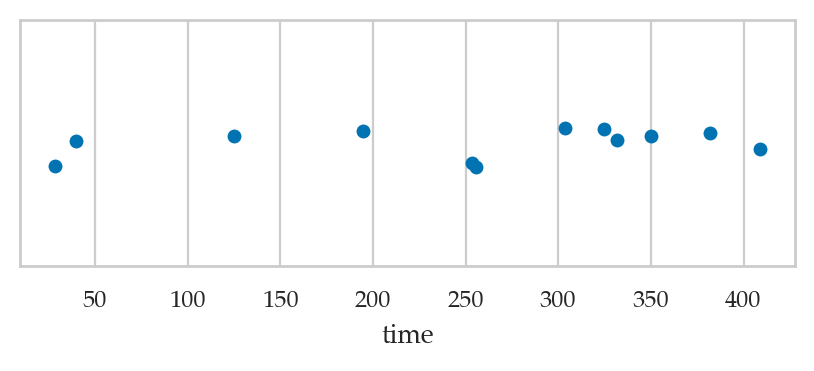

In [61]:
times = players["time"]
sns.stripplot(x=times)

<Axes: xlabel='time'>

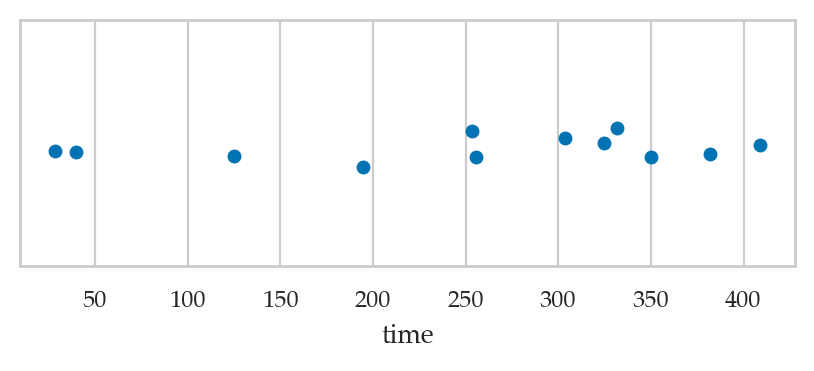

In [62]:
sns.stripplot(data=players, x="time")

<Axes: xlabel='time'>

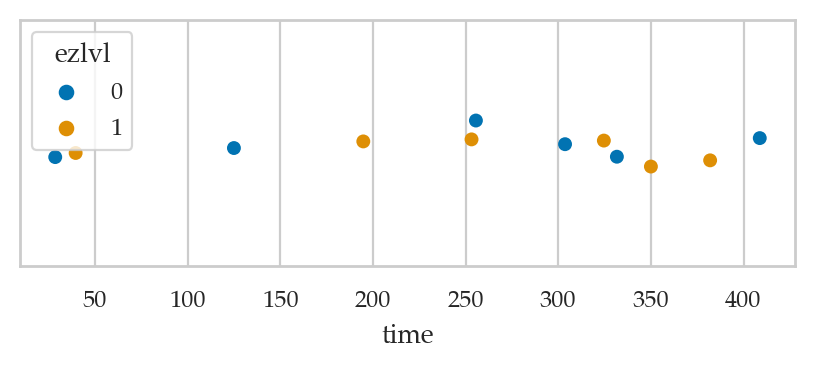

In [63]:
sns.stripplot(data=players, x="time", hue="ezlvl")

Saved figure to figures/data/practice/players-striplot-time.pdf
Saved figure to figures/data/practice/players-striplot-time.png


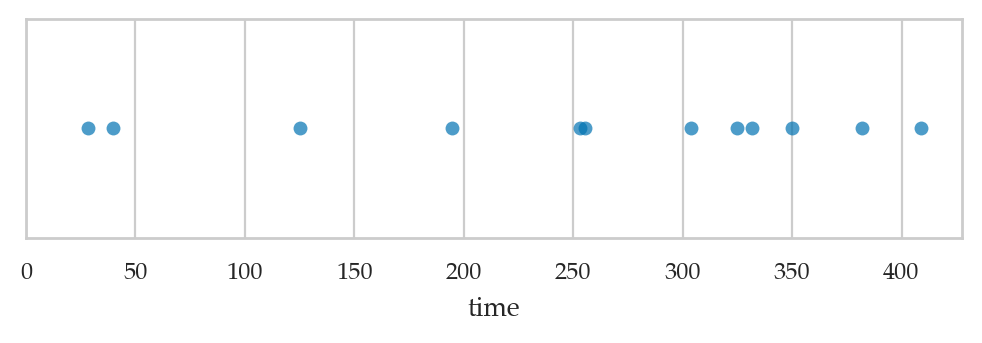

In [64]:
# figures only
filename = os.path.join(DESTDIR, "players-striplot-time.pdf")

with plt.rc_context({"figure.figsize":(5,1.8)}):
    fig, ax = plt.subplots()
    sns.stripplot(x="time", data=players, jitter=0, ax=ax, alpha=0.7)
    ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])

savefigure(fig, filename)

Saved figure to figures/data/practice/players-striplot-time-hue-ezlvl.pdf
Saved figure to figures/data/practice/players-striplot-time-hue-ezlvl.png


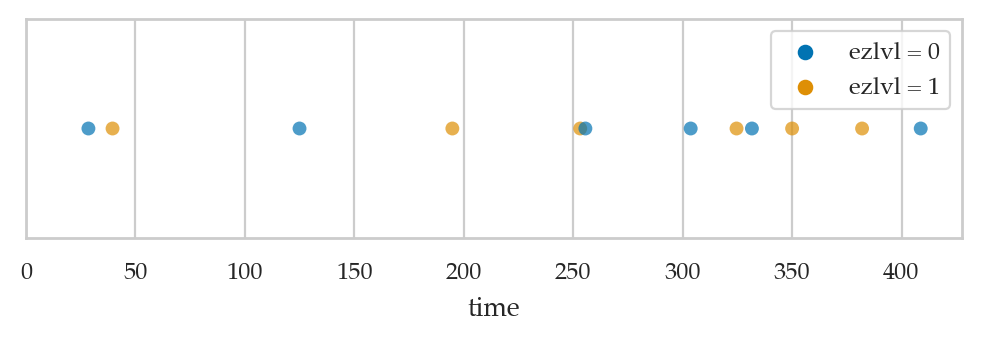

In [65]:
# figures only
filename = os.path.join(DESTDIR, "players-striplot-time-hue-ezlvl.pdf")

with plt.rc_context({"figure.figsize":(5,1.8)}):
    fig, ax = plt.subplots()
    sns.stripplot(x="time", hue="ezlvl", data=players, jitter=0, ax=ax, alpha=0.7)
    ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    
    # set lengend
    leg2 = ax.get_legend()
    handles_dict = {handle.get_label(): handle for handle in leg2.legend_handles}
    handles = []
    for label_index in ["0", "1"]:
        handles.append(handles_dict[label_index])
    labels = ["ezlvl = 0", "ezlvl = 1"]
    ax.legend(handles, labels)

savefigure(fig, filename)

### Studying the effect of `ezlvl` on `time`

The players dataset was collected as part of an experiment
designed to answer the question "Does the easy first level lead to an improvement in user retention?"
We want to compare the `time` variable (total time players spent in the game)
of players who were shown the "easy level" version of the game (`ezlvl==1`)
to the control group of played who played the regular vesion of the game (`ezlvl==0`).

In [66]:
mean0 = players[players["ezlvl"]==0]["time"].mean()
mean0

242.17333333333332

In [67]:
mean1 = players[players["ezlvl"]==1]["time"].mean()
mean1

257.34166666666664

<Axes: xlabel='time', ylabel='ezlvl'>

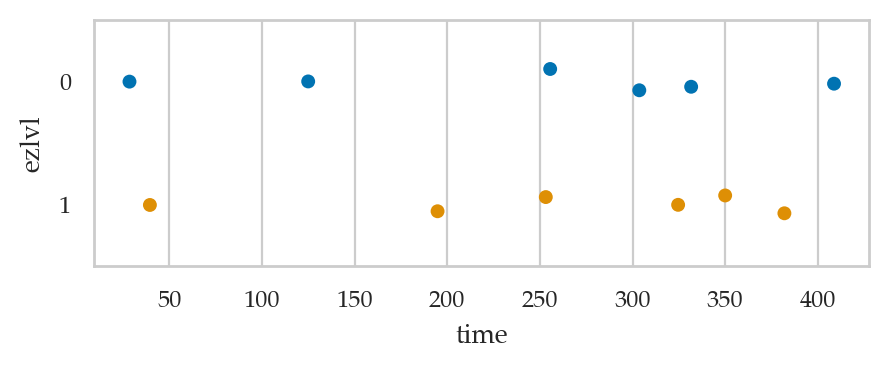

In [68]:
sns.stripplot(data=players, x="time", y="ezlvl",
              hue="ezlvl", orient="h", legend=None)

<Axes: xlabel='time', ylabel='ezlvl'>

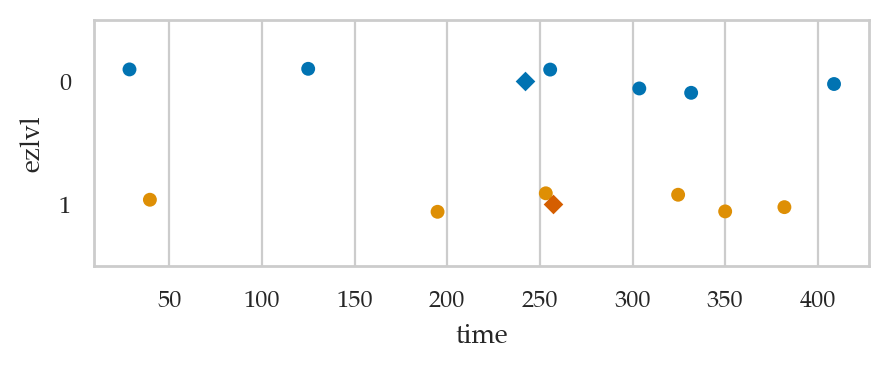

In [69]:
ax = sns.stripplot(data=players, x="time", y="ezlvl", hue="ezlvl", orient="h", legend=None)
sns.stripplot(x=[mean0], y=[0], marker="D", orient="h", color="b", ax=ax)
sns.stripplot(x=[mean1], y=[1], marker="D", orient="h", color="r", ax=ax)

Saved figure to figures/data/practice/players-stripplot-x-time-y-ezlvl-with-means.pdf
Saved figure to figures/data/practice/players-stripplot-x-time-y-ezlvl-with-means.png


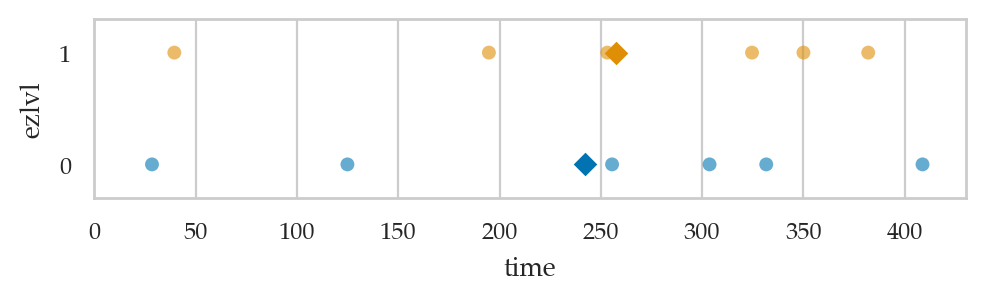

In [70]:
# figures only
filename = os.path.join(DESTDIR, "players-stripplot-x-time-y-ezlvl-with-means.pdf")

means = players.groupby("ezlvl")["time"].mean()

ax = sns.stripplot(data=players, x="time", y="ezlvl", hue="ezlvl",
                   jitter=0, orient="h", alpha=0.6)
sns.stripplot(x=[means[1]], y=[1], marker="D", orient="h", s=6, ax=ax, color=orange)
sns.stripplot(x=[means[0]], y=[0], marker="D", orient="h", s=6, ax=ax, color=blue)
ax.get_legend().remove()
ax.set_xlim([0,430])
ax.set_ylim([-0.3,1.3])
ax.set_yticks([0,1])
ax.set_yticklabels([0,1])

savefigure(ax, filename)

### Studying the relationship between `age` and `time`

The secondary research question,
is to look for a correlation between the `age` variable and the `time` variable.

<Axes: xlabel='age', ylabel='time'>

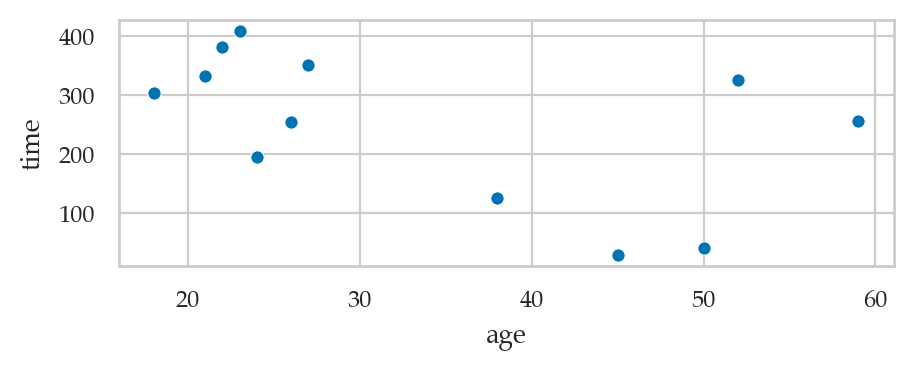

In [71]:
sns.scatterplot(data=players, x="age", y="time")

<Axes: xlabel='age', ylabel='time'>

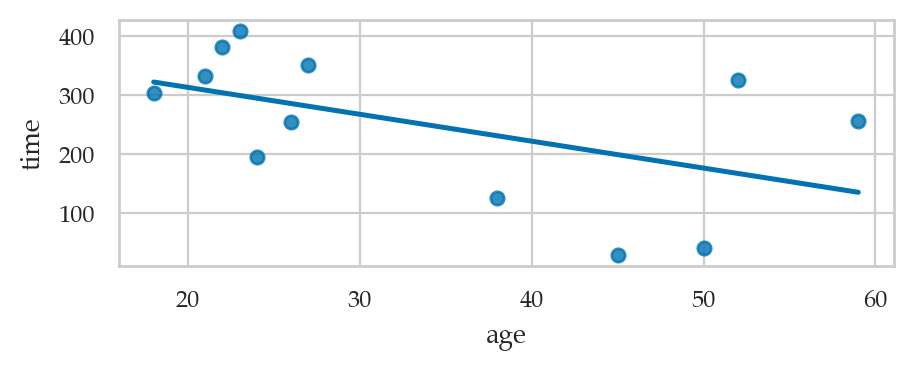

In [72]:
sns.regplot(data=players, x="age", y="time", ci=None)

Saved figure to figures/data/practice/players-time-vs-age-scatterplot-and-regplot.pdf
Saved figure to figures/data/practice/players-time-vs-age-scatterplot-and-regplot.png


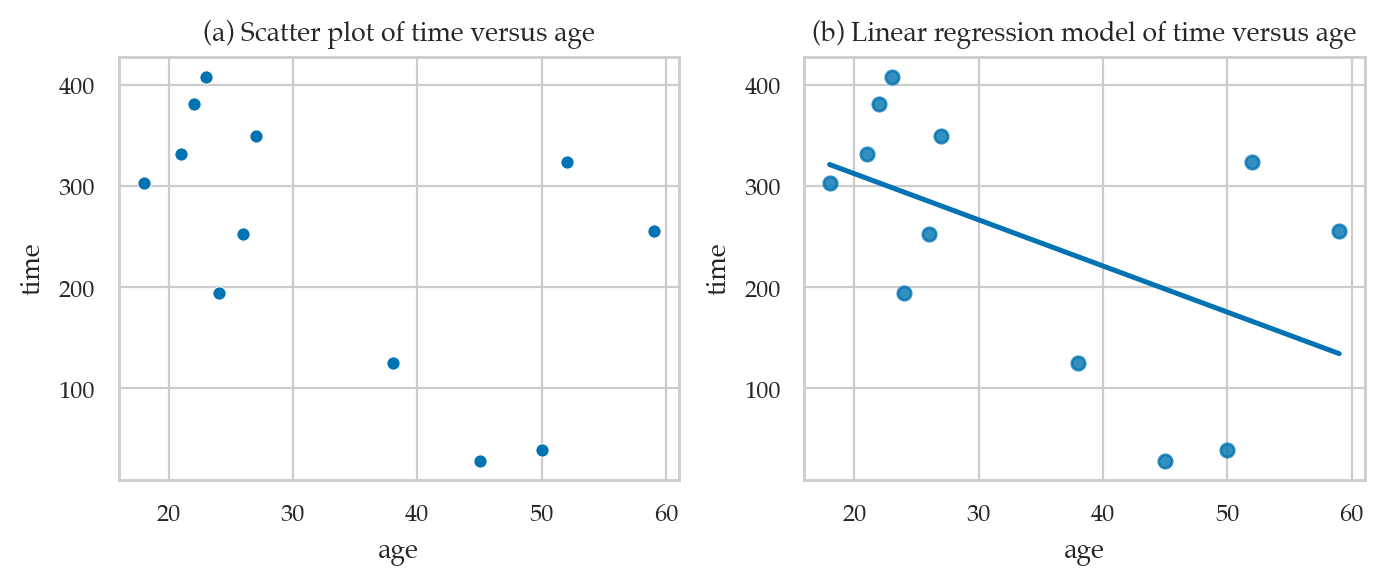

In [73]:
# figures only
filename = os.path.join(DESTDIR, "players-time-vs-age-scatterplot-and-regplot.pdf")

with plt.rc_context({"figure.figsize":(7,3)}): #, sns.axes_style("ticks"):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # (a)
    sns.scatterplot(x="age", y="time", data=players, ax=ax1)
    ax1.set_title("(a) Scatter plot of time versus age")

    # (b)
    sns.regplot(x="age", y="time", ci=None, data=players, ax=ax2)
    ax2.set_title("(b) Linear regression model of time versus age")

savefigure(fig, filename)

## Real-world datasets

In [74]:
# figures only
datasets_list = [
    {
        "index": "",
        "filename": 'players.csv',
        "sections": "1.1, 1.2",
        "uses": "Intro to Pandas and Seaborn",
     },
    {
        "index":1,
        "filename": 'apples.csv',
        "client name": "Alice",
        "sections": "3.1, 3.2",
        "uses": "Estimation",
     },
    {
        "index":2,
        "filename": 'eprices.csv',
        "client name": "Bob",
        "sections": "3.1, 3.5",
        "uses": "Esimtation and hypothesis testing",
     },
    {
        "index":3,
        "filename": 'students.csv',
        "client name": "Charlotte",
        "sections": "1.3, 3.1, 3.5, 4.1",
        "uses": "Descr. stats and hypothesis testing",
    },
    {
        "index":4,
        "filename": 'kombucha.csv',
        "client name": "Khalid",
        "sections": "3.1, 3.2, 3.3, 3.4",
        "uses": "Estimation and hypothesis testing",
     },
    {
        "index":5,
        "filename": 'doctors.csv',
        "client name": "Dan",
        "sections": "3.1, 3.2, 3.5, 4.1",
        "uses": "Hypothesis testing",
     },
    {
        "index":6,
        "filename": 'visitors.csv',
        "client name": "Vanessa",
        "sections": "3.6",
        "uses": "Test of two proportions",
     },
    {
        "index": "",
        "filename": 'minimal.csv',
        "shape": "5x4",
        "sections": "Appendix D",
        "uses": "Pandas data frame maniulations",
    },
]

# fill in directory
for ds in datasets_list:
    if not "directory" in ds:
        ds["directory"] = "datasets/"

# calculate shape
for ds in datasets_list:
    ds_path = os.path.join("..", ds["directory"], ds["filename"])
    ds_df = pd.read_csv(ds_path)
    ds["shape"] = str(ds_df.shape[0]) + "x" + str(ds_df.shape[1])

# wrap filenames in \tt
for ds in datasets_list:
    filename = ds["filename"]
    ds["filename"] = r"\tt{" + filename + "}"

datasets_df = pd.DataFrame(datasets_list)
datasets_df = datasets_df[[
    "index",
    "client name",
    "filename",
    "shape",
    "sections",
]]

pd.set_option('display.width', 400)
# print(datasets_df.to_latex(index=False, escape=False))

### Apple weights

In [75]:
apples = pd.read_csv("../datasets/apples.csv")
apples.shape

(30, 1)

In [76]:
apples.head(3)

,weight
0,205.0
1,182.0
2,192.0


In [77]:
apples['weight'].mean()

202.6

<Axes: xlabel='weight'>

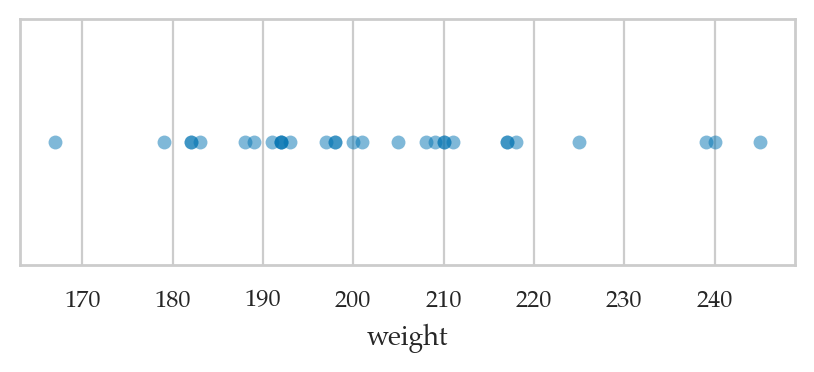

In [78]:
sns.stripplot(data=apples, x="weight", jitter=0, alpha=0.5)

Saved figure to figures/data/practice/apples-stripplot-weight.pdf
Saved figure to figures/data/practice/apples-stripplot-weight.png


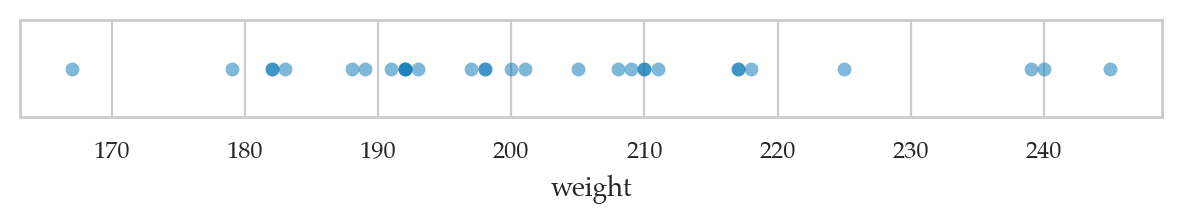

In [79]:
# figures only
filename = os.path.join(DESTDIR, "apples-stripplot-weight.pdf")
with plt.rc_context({"figure.figsize":(6,1.2)}):
    fig, ax = plt.subplots()
    sns.stripplot(data=apples, x="weight", jitter=0, alpha=0.5)
savefigure(fig, filename)

### Electricity prices

In [80]:
epriceswide = pd.read_csv("../datasets/epriceswide.csv")
epriceswide.shape

(9, 2)

In [81]:
epriceswide

,East,West
0,7.7,11.8
1,5.9,10.0
2,7.0,11.0
3,4.8,8.6
4,6.3,8.3
5,6.3,9.4
6,5.5,8.0
7,5.4,6.8
8,6.5,8.5


In [82]:
eprices = epriceswide.melt(var_name="loc", value_name="price")
eprices.head()

,loc,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3


<Axes: xlabel='price', ylabel='loc'>

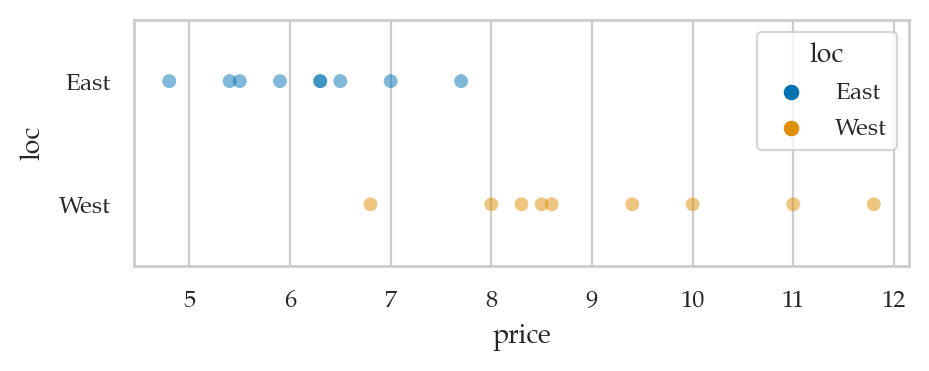

In [83]:
sns.stripplot(data=eprices, x="price",
              y="loc", hue="loc", jitter=0, alpha=0.5)

Saved figure to figures/data/practice/eprices-stripplot-price-vs-loc.pdf
Saved figure to figures/data/practice/eprices-stripplot-price-vs-loc.png


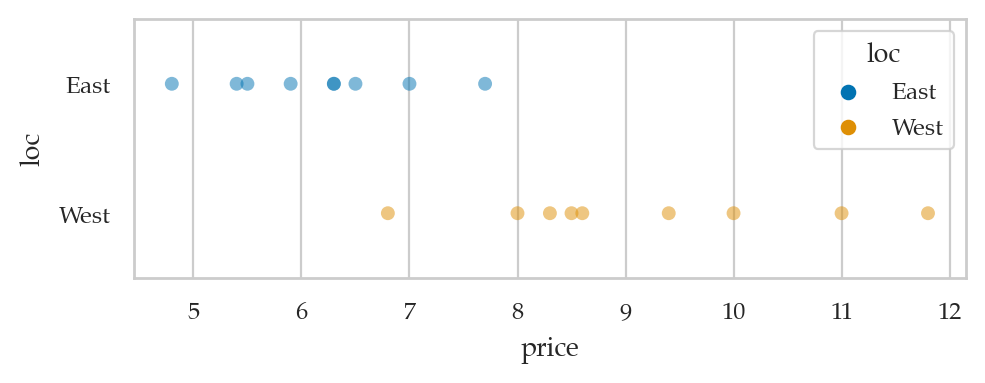

In [84]:
# figures only
filename = os.path.join(DESTDIR, "eprices-stripplot-price-vs-loc.pdf")
with plt.rc_context({"figure.figsize":(5,2)}):
    fig, ax = plt.subplots()
    sns.stripplot(data=eprices, x="price", y="loc", hue="loc", jitter=0, alpha=0.5)
savefigure(fig, filename)

### Students' scores

In [85]:
students = pd.read_csv("../datasets/students.csv")
students.shape

(15, 5)

In [86]:
# students

In [87]:
students[students["curriculum"]=="lecture"]

,student_ID,background,curriculum,effort,score
1,2,science,lecture,8.69,75.0
3,4,arts,lecture,7.92,70.3
6,7,science,lecture,7.81,72.7
7,8,business,lecture,9.13,75.4
8,9,business,lecture,5.21,57.0
9,10,science,lecture,7.71,69.0
13,14,science,lecture,6.39,57.6


In [88]:
lscores = students[students["curriculum"]=="lecture"]["score"]
lscores.mean()

68.14285714285714

In [89]:
dscores = students[students["curriculum"]=="debate"]["score"]
dscores.mean()

76.4625

<Axes: xlabel='score', ylabel='curriculum'>

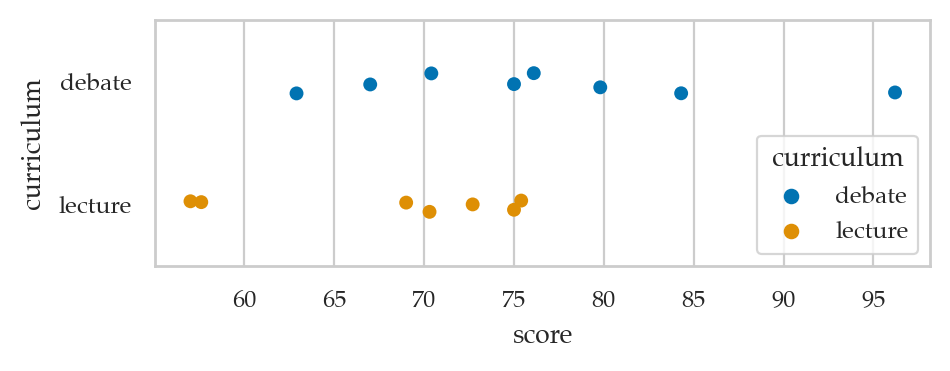

In [90]:
sns.stripplot(data=students, x="score", y="curriculum", hue="curriculum")

Saved figure to figures/data/practice/students-stripplot-score-vs-curriculum.pdf
Saved figure to figures/data/practice/students-stripplot-score-vs-curriculum.png


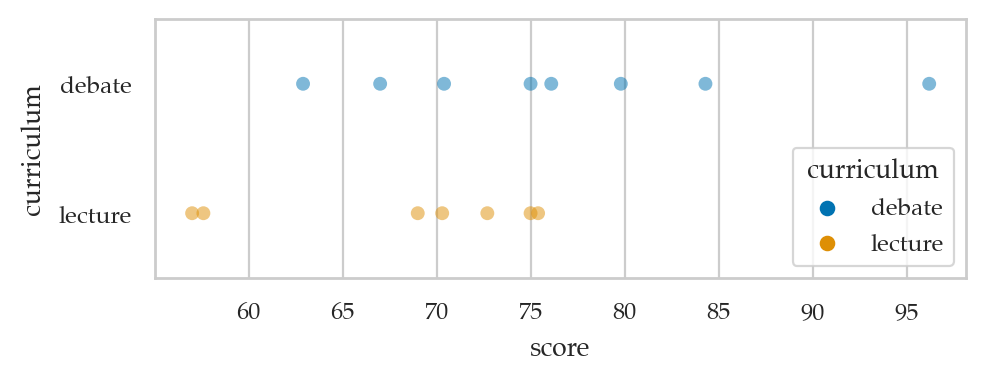

In [113]:
# figures only
filename = os.path.join(DESTDIR, "students-stripplot-score-vs-curriculum.pdf")
with plt.rc_context({"figure.figsize":(5,2)}):
    fig, ax = plt.subplots()
    sns.stripplot(data=students, x="score", y="curriculum", hue="curriculum", jitter=0, alpha=0.5)
savefigure(fig, filename)

### Kombucha volumes

In [92]:
kombucha = pd.read_csv("../datasets/kombucha.csv")
kombucha.shape

(347, 2)

In [93]:
kombucha.columns

Index(['batch', 'volume'], dtype='object')

In [94]:
kombucha.head(3)

,batch,volume
0,1,1016.24
1,1,993.88
2,1,994.72


In [95]:
kombucha.tail(3)

,batch,volume
344,10,996.62
345,10,1012.56
346,10,992.68


In [96]:
kombucha["batch"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [97]:
batch01 = kombucha[kombucha["batch"]==1]
ksample01 = batch01["volume"]
ksample01.mean()

999.10375

<Axes: xlabel='batch', ylabel='volume'>

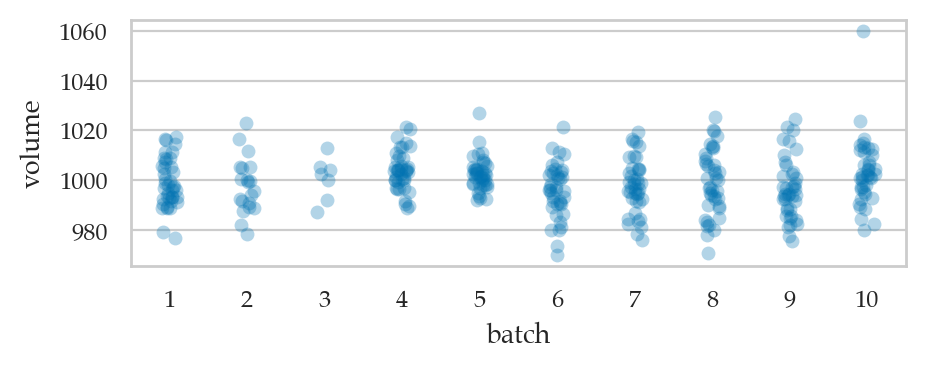

In [98]:
sns.stripplot(data=kombucha, x="batch", y="volume", alpha=0.3)

Saved figure to figures/data/practice/kombucha-stripplot-all-batches.pdf
Saved figure to figures/data/practice/kombucha-stripplot-all-batches.png


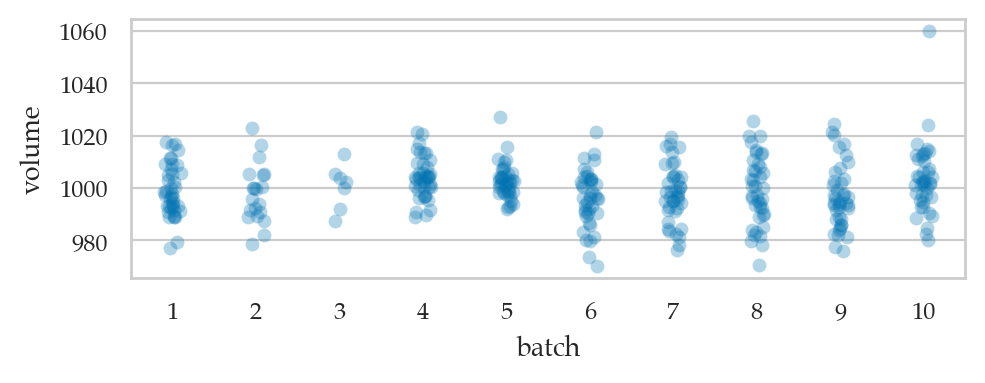

In [99]:
# figures only
filename = os.path.join(DESTDIR, "kombucha-stripplot-all-batches.pdf")
with plt.rc_context({"figure.figsize":(5,2)}):
    fig, ax = plt.subplots()
    sns.stripplot(data=kombucha, x="batch", y="volume", alpha=0.3)
savefigure(fig, filename)

### Doctors' sleep study

In [100]:
doctors = pd.read_csv("../datasets/doctors.csv")
doctors.shape

(224, 4)

In [101]:
doctors.head(3)

,permit,name,location,score
0,93636,Yesenia Smith,urban,82.0
1,79288,Andrew Stanley,rural,85.0
2,94980,Jessica Castro,rural,97.0


<Axes: xlabel='score', ylabel='location'>

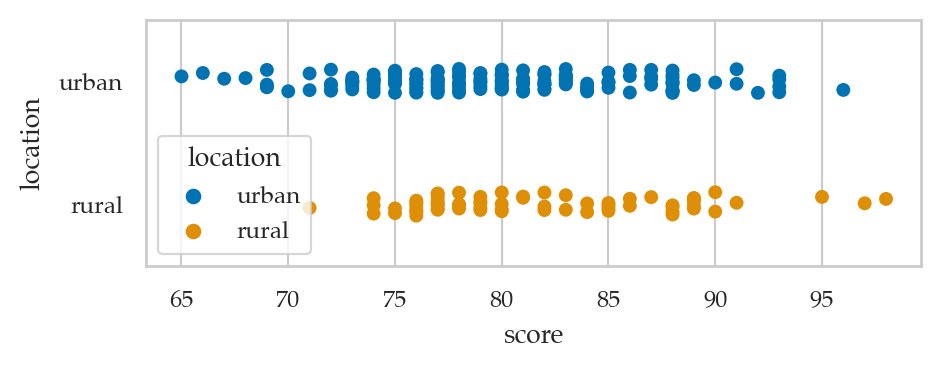

In [102]:
sns.stripplot(data=doctors, x="score", y="location", hue="location")

Saved figure to figures/data/practice/doctors-stripplot-score-vs-location.pdf
Saved figure to figures/data/practice/doctors-stripplot-score-vs-location.png


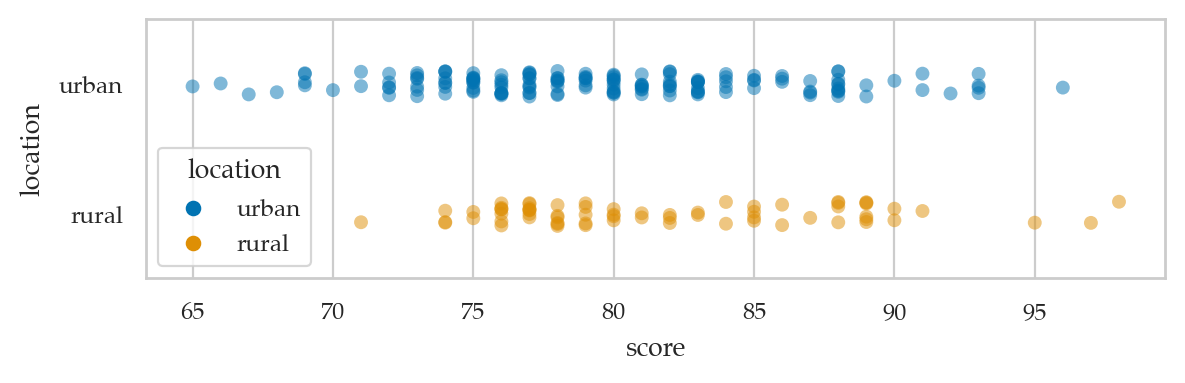

In [103]:
# figures only
filename = os.path.join(DESTDIR, "doctors-stripplot-score-vs-location.pdf")
with plt.rc_context({"figure.figsize":(6,2)}):
    fig, ax = plt.subplots()
    sns.stripplot(data=doctors, x="score", y="location", hue="location", alpha=0.5)
savefigure(fig, filename)

#### Average sleep scores for doctors in different locations

In [104]:
udoctors = doctors[doctors["location"]=="urban"]
udoctors["score"].mean()

79.57051282051282

In [105]:
rdoctors = doctors[doctors["location"]=="rural"]
rdoctors["score"].mean()

81.79411764705883

### Website visitors

In [106]:
visitors = pd.read_csv("../datasets/visitors.csv")
visitors.shape

(2000, 3)

In [107]:
visitors.head(5)

,IP address,version,bought
0,135.185.92.4,A,0
1,14.75.235.1,A,1
2,50.132.244.139,B,0
3,144.181.130.234,A,0
4,90.92.5.100,B,0


In [108]:
visitors[visitors["version"]=="A"]["bought"].mean()

0.06482465462274177

In [109]:
visitors[visitors["version"]=="B"]["bought"].mean()

0.03777148253068933

<Axes: xlabel='bought', ylabel='version'>

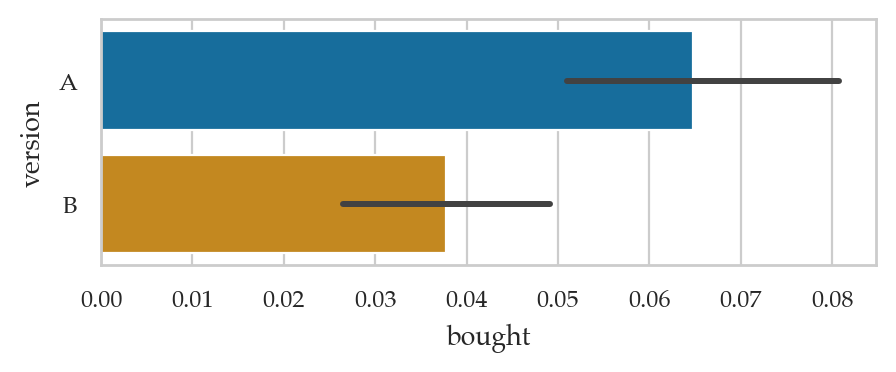

In [110]:
sns.barplot(data=visitors, x="bought", y="version")

Saved figure to figures/data/practice/visitors-barplot-bought-vs-version.pdf
Saved figure to figures/data/practice/visitors-barplot-bought-vs-version.png


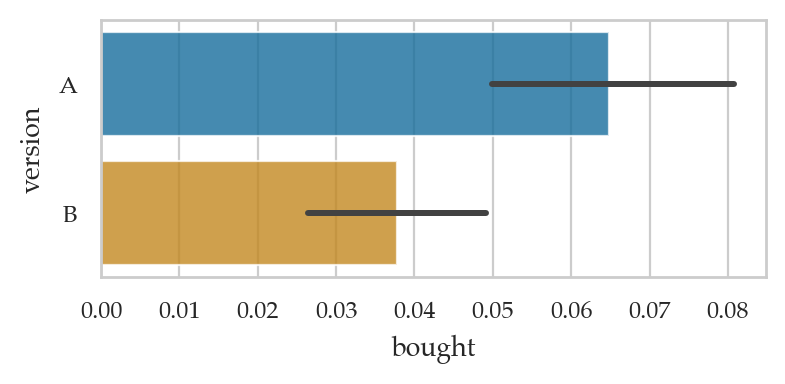

In [111]:
# figures only
filename = os.path.join(DESTDIR, "visitors-barplot-bought-vs-version.pdf")
with plt.rc_context({"figure.figsize":(4,2)}):
    fig, ax = plt.subplots()
    sns.barplot(data=visitors, x="bought", y="version", alpha=0.8, order=["A","B"])
    # sns.barplot(data=visitors, x="version", y="bought", capsize=0.1, errwidth=1.1)
savefigure(fig, filename)

## Discussion

### Data extraction

### Data transformations

### Tidy data

In [112]:
epriceswide = pd.read_csv("../datasets/epriceswide.csv")
epriceswide.melt(var_name="loc", value_name="price")

,loc,price
0,East,7.7
1,East,5.9
2,East,7.0
3,East,4.8
4,East,6.3
5,East,6.3
6,East,5.5
7,East,5.4
8,East,6.5
9,West,11.8


### Data cleaning

## Links

